In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

In [8]:
df = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\online_retail_sales_cleaned2.csv")
df

,Order_ID,Date,Customer_ID,Country,Product,Category,Quantity,Price_per_Unit,Payment_Method,Total_Sale
0,1001,2025-07-27,C058,Canada,Pen,Stationery,2,20,PayPal,40
1,1002,2025-07-03,C094,India,Jeans,Clothing,5,1200,PayPal,6000
2,1003,2025-07-23,C081,Australia,Laptop Bag,Bags,2,1500,Debit Card,3000
3,1004,2025-07-20,C001,UK,Laptop Bag,Bags,4,1500,Debit Card,6000
4,1005,2025-07-02,C007,Canada,Sneakers,Footwear,2,3000,UPI,6000
...,...,...,...,...,...,...,...,...,...,...
195,1196,2025-07-28,C050,Canada,T-Shirt,Clothing,1,500,Debit Card,500
196,1197,2025-07-04,C006,UK,Laptop Bag,Bags,1,1500,UPI,1500
197,1198,2025-07-16,C081,USA,Laptop Bag,Bags,5,1500,Debit Card,7500
198,1199,2025-07-01,C018,India,Laptop Bag,Bags,5,1500,PayPal,7500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        200 non-null    int64 
 1   Date            200 non-null    object
 2   Customer_ID     200 non-null    object
 3   Country         200 non-null    object
 4   Product         200 non-null    object
 5   Category        200 non-null    object
 6   Quantity        200 non-null    int64 
 7   Price_per_Unit  200 non-null    int64 
 8   Payment_Method  200 non-null    object
 9   Total_Sale      200 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 15.8+ KB


In [10]:
df.describe()

,Order_ID,Quantity,Price_per_Unit,Total_Sale
count,200.000000,200.000000,200.000000,200.000000
mean,1100.500000,2.940000,1278.500000,3817.200000
std,57.879185,1.395038,886.310035,3524.894975
min,1001.000000,1.000000,20.000000,20.000000
25%,1050.750000,2.000000,500.000000,1200.000000
50%,1100.500000,3.000000,1500.000000,3000.000000
75%,1150.250000,4.000000,1800.000000,6000.000000
max,1200.000000,5.000000,3000.000000,15000.000000


In [11]:
df.isnull()

,Order_ID,Date,Customer_ID,Country,Product,Category,Quantity,Price_per_Unit,Payment_Method,Total_Sale
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Order_ID          0
Date              0
Customer_ID       0
Country           0
Product           0
Category          0
Quantity          0
Price_per_Unit    0
Payment_Method    0
Total_Sale        0
dtype: int64

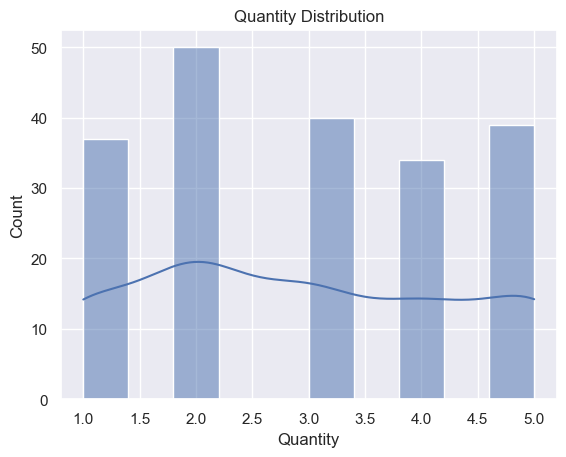

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Quantity'], bins=10, kde=True)
plt.title('Quantity Distribution')
plt.show()


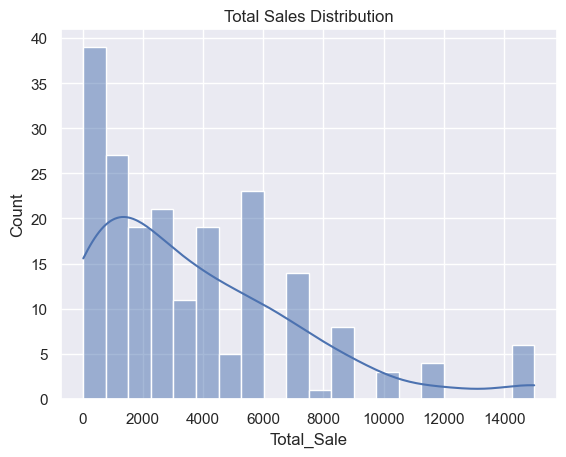

In [14]:
sns.histplot(df['Total_Sale'], bins=20, kde=True)
plt.title('Total Sales Distribution')
plt.show()


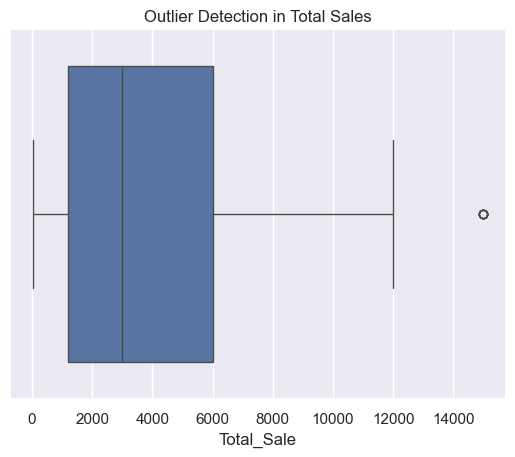

In [15]:
sns.boxplot(x=df['Total_Sale'])
plt.title('Outlier Detection in Total Sales')
plt.show()


In [16]:
Q1 = df['Total_Sale'].quantile(0.25)
Q3 = df['Total_Sale'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Total_Sale'] < lower_bound) | (df['Total_Sale'] > upper_bound)]
print(f"Outliers found: {len(outliers)}")


Outliers found: 6


In [18]:
df_no_outliers = df[(df['Total_Sale'] >= lower_bound) & (df['Total_Sale'] <= upper_bound)]


In [19]:
df['Total_Sale_Capped'] = df['Total_Sale'].clip(lower=lower_bound, upper=upper_bound)


In [20]:
print("Original dataset size:", len(df))
print("Dataset size after removing outliers:", len(df_no_outliers))


Original dataset size: 200
Dataset size after removing outliers: 194


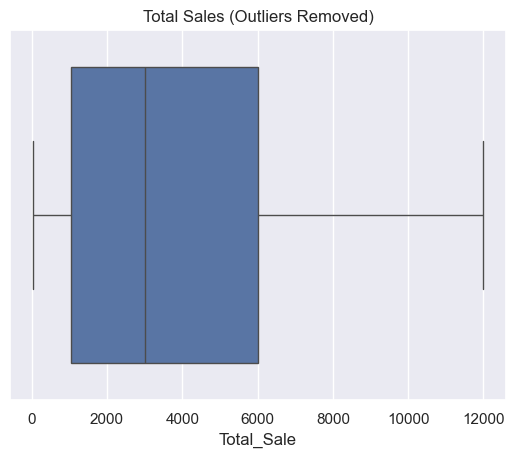

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_no_outliers['Total_Sale'])
plt.title('Total Sales (Outliers Removed)')
plt.show()


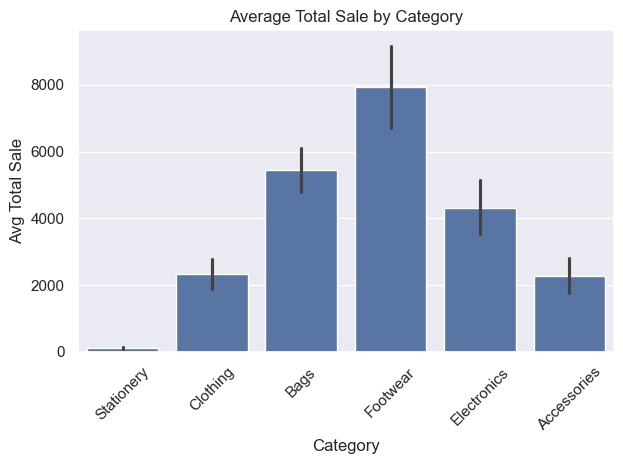

In [23]:
sns.barplot(data=df_no_outliers, x='Category', y='Total_Sale', estimator='mean')
plt.title('Average Total Sale by Category')
plt.ylabel('Avg Total Sale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


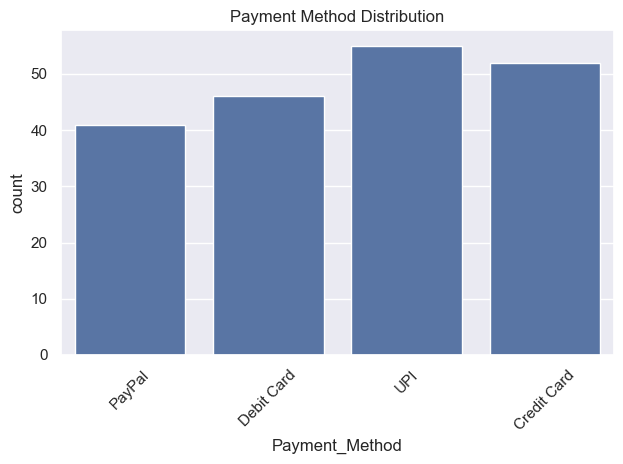

In [24]:
sns.countplot(data=df_no_outliers, x='Payment_Method')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


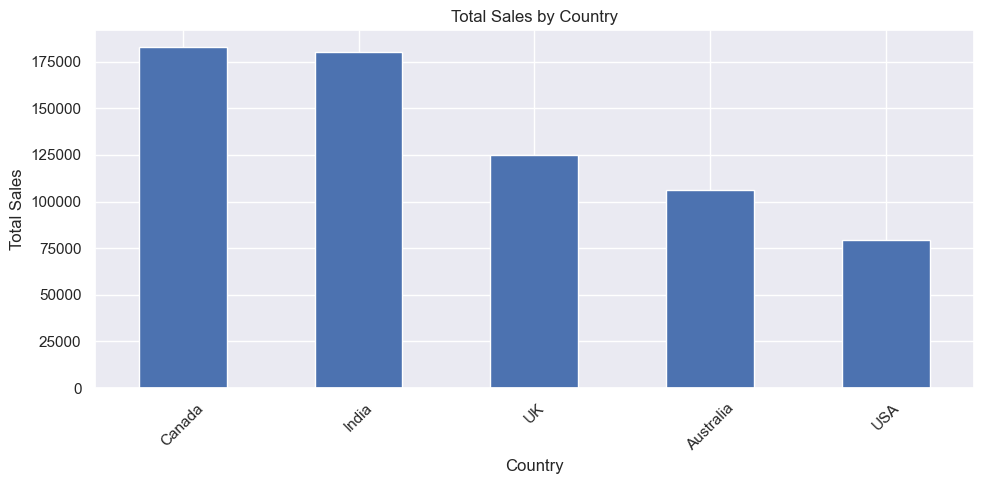

In [25]:
df_no_outliers.groupby('Country')['Total_Sale'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Total Sales by Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


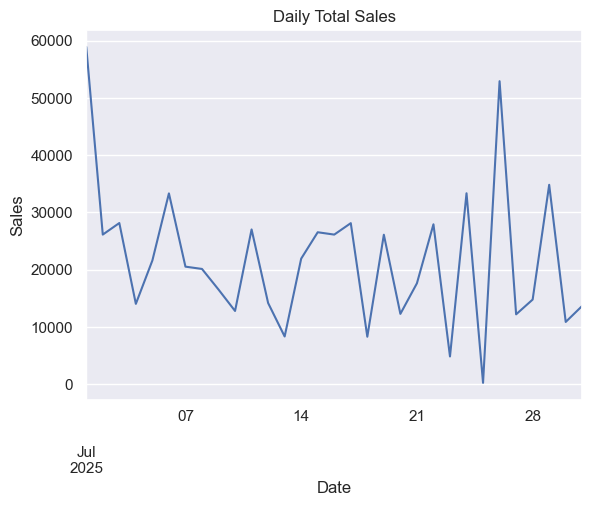

In [30]:
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Date'])  # replace with correct column name
df_no_outliers.set_index('Date')['Total_Sale'].resample('D').sum().plot()
plt.title('Daily Total Sales')
plt.ylabel('Sales')
plt.show()


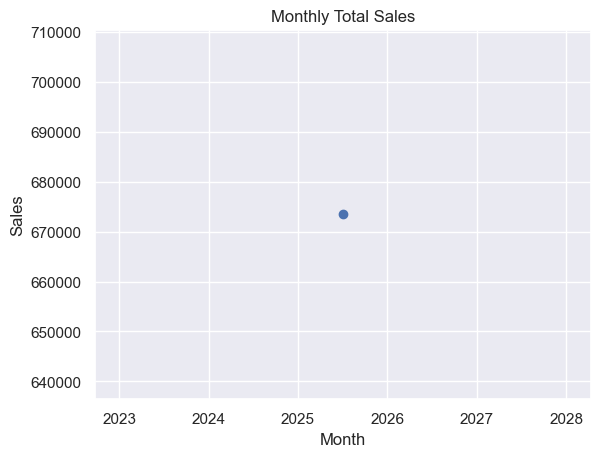

In [32]:
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Date'])

df_no_outliers = df_no_outliers.set_index('Date')

df_no_outliers['Total_Sale'].resample('M').sum().plot(marker='o')
plt.title('Monthly Total Sales')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()


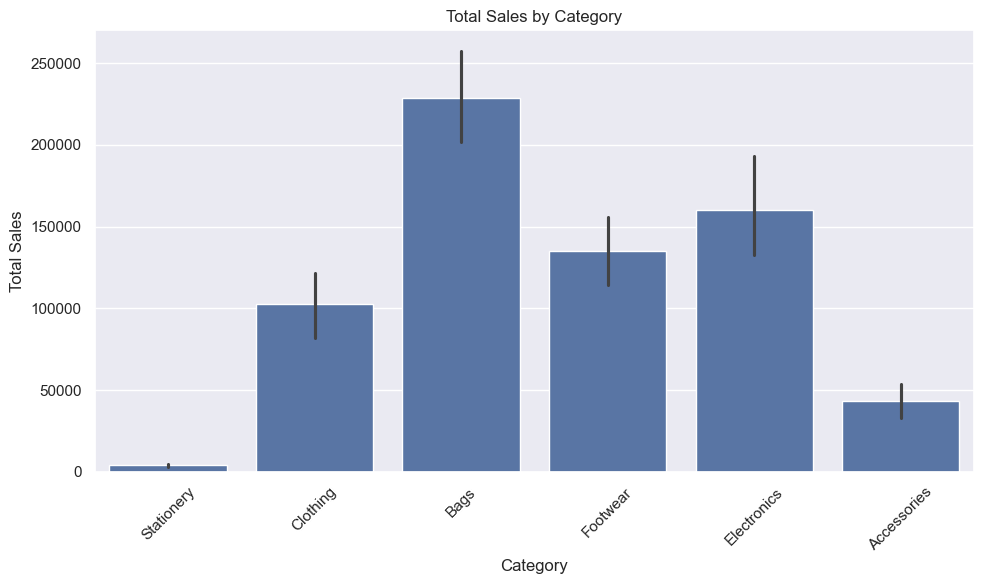

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_no_outliers, x='Category', y='Total_Sale', estimator='sum')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

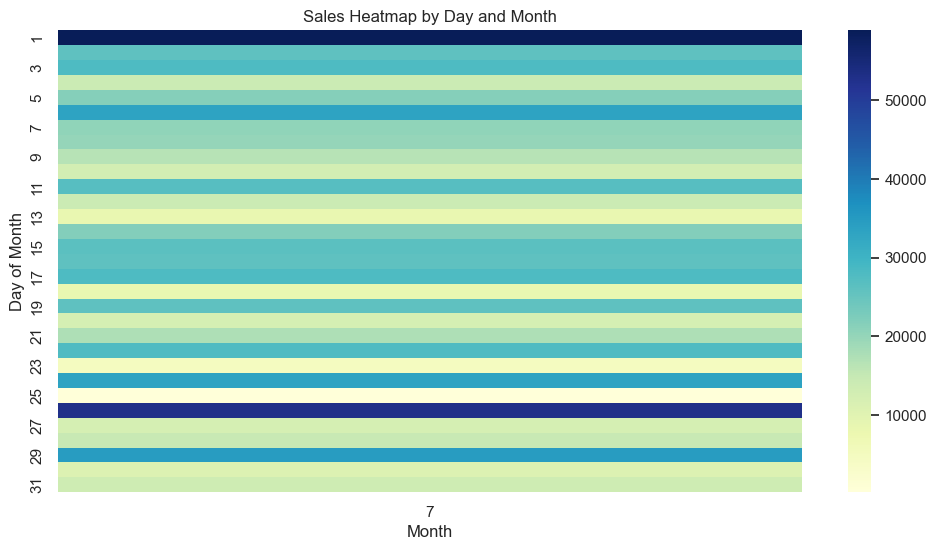

In [34]:
df_no_outliers['Month'] = df_no_outliers.index.month
df_no_outliers['Day'] = df_no_outliers.index.day

pivot = df_no_outliers.pivot_table(values='Total_Sale', index='Day', columns='Month', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Sales Heatmap by Day and Month')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.show()


In [35]:
top_products = df_no_outliers.groupby('Product_Name')['Total_Sale'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Selling Products')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Product_Name'

In [36]:
print(df_no_outliers.columns)


Index(['Order_ID', 'Customer_ID', 'Country', 'Product', 'Category', 'Quantity',
       'Price_per_Unit', 'Payment_Method', 'Total_Sale', 'Month', 'Day'],
      dtype='object')


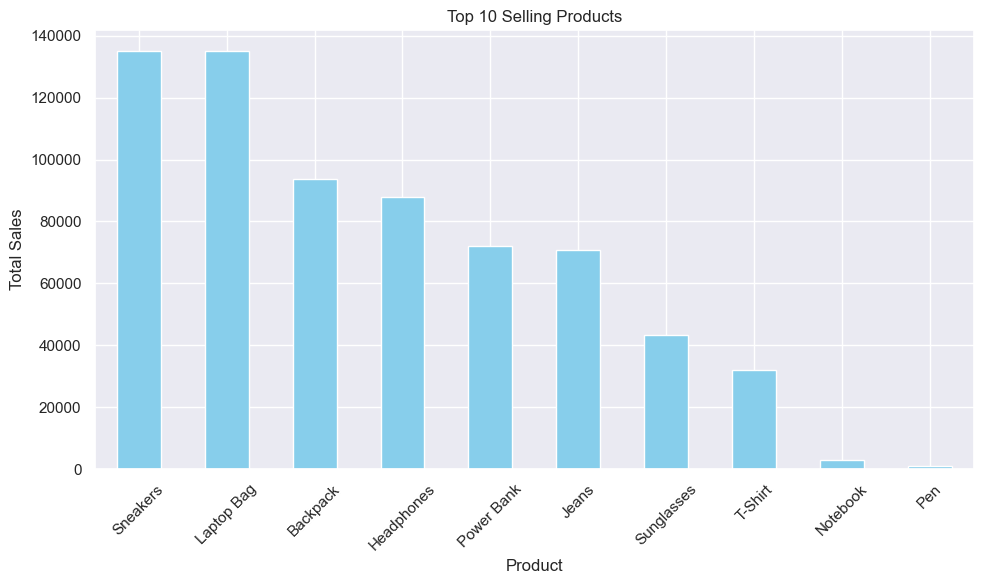

In [37]:
top_products = df_no_outliers.groupby('Product')['Total_Sale'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Selling Products')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



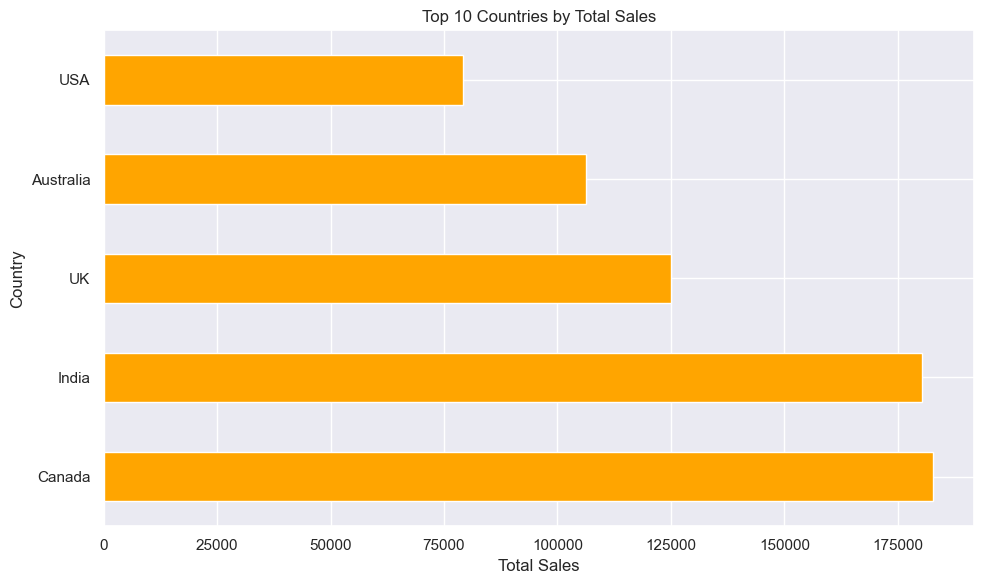

In [38]:
top_countries = df_no_outliers.groupby('Country')['Total_Sale'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


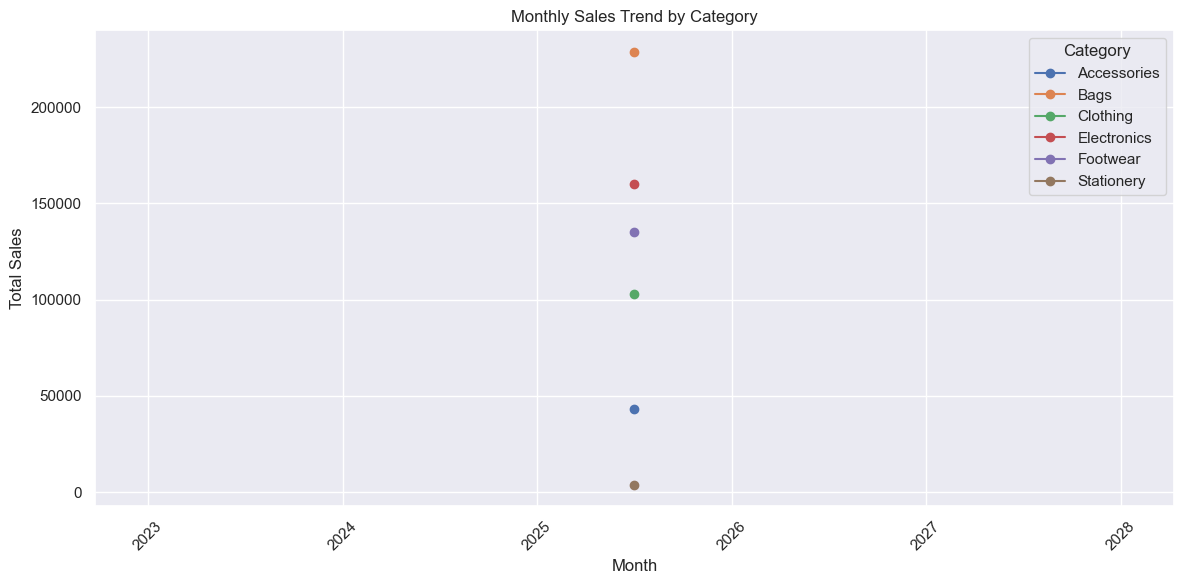

In [39]:
# Group by month and category
category_trend = df_no_outliers.groupby([df_no_outliers.index.to_period('M'), 'Category'])['Total_Sale'].sum().unstack()

# Plot
category_trend.plot(figsize=(12, 6), marker='o')
plt.title('Monthly Sales Trend by Category')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


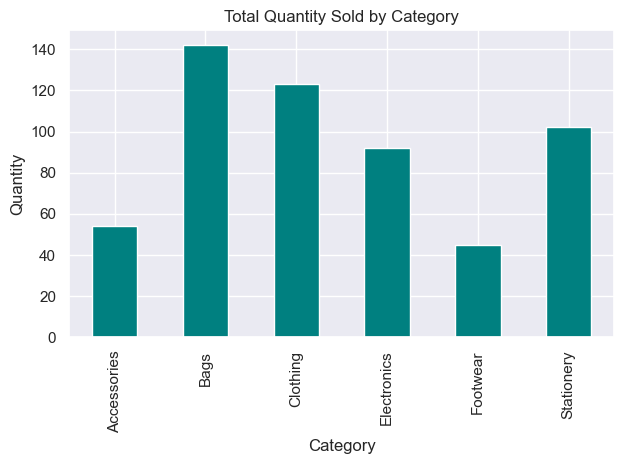

In [40]:
df_no_outliers.groupby('Category')['Quantity'].sum().plot(kind='bar', color='teal')
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()


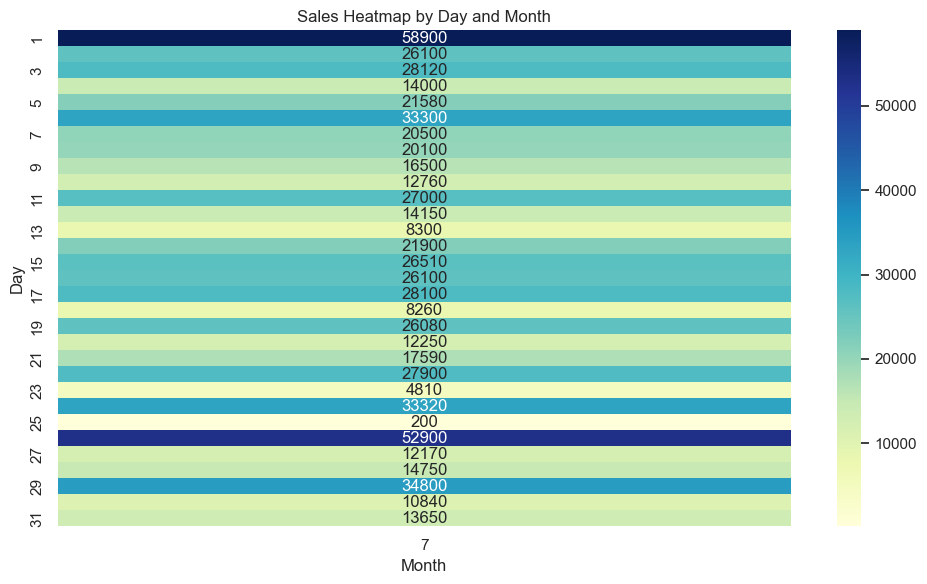

In [41]:
heatmap_data = df_no_outliers.pivot_table(index='Day', columns='Month', values='Total_Sale', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Heatmap by Day and Month')
plt.tight_layout()
plt.show()


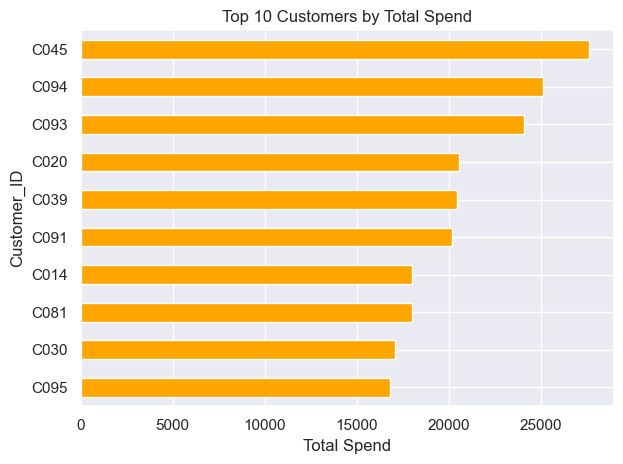

In [42]:
top_customers = df_no_outliers.groupby('Customer_ID')['Total_Sale'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='barh', color='orange')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Total Spend')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


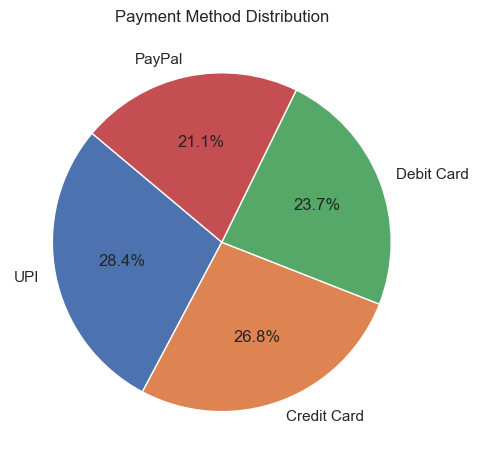

In [43]:
df_no_outliers['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()



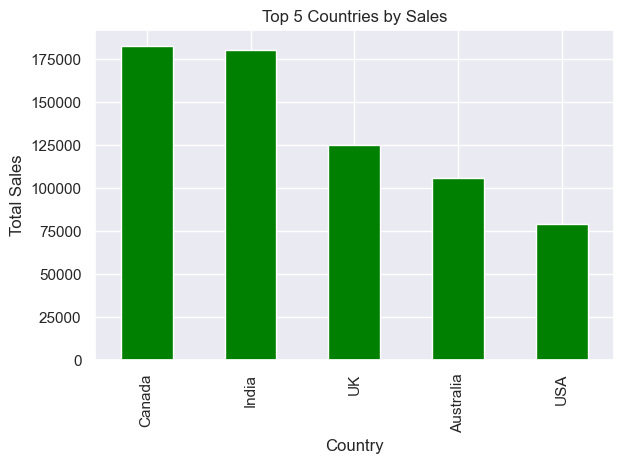

In [44]:
top_countries = df_no_outliers.groupby('Country')['Total_Sale'].sum().sort_values(ascending=False).head(5)

top_countries.plot(kind='bar', color='green')
plt.title('Top 5 Countries by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


In [ ]:
df_no_outliers.groupby('Category').apply(lambda x: x['Total_Sale'].sum() / x['Quantity'].sum()).plot(kind='bar', color='purple')
plt.title('Revenue per Unit by Category')
plt.ylabel('Revenue per Unit')
plt.tight_layout()
plt.show()
